# LUMINEX——pYAP, pABL, and pSRC DASATINIB DOSE RESPONSE 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Bead Counts

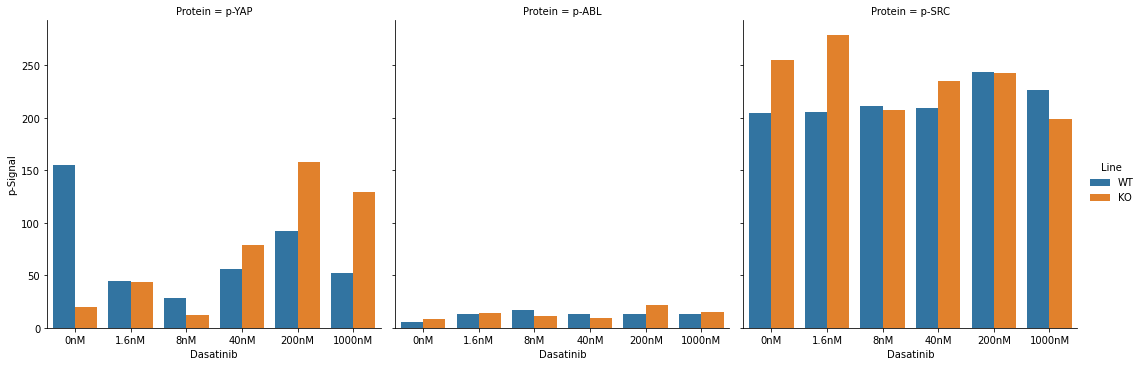

In [37]:
counts = pd.read_csv("msresist/data/Validations/DasatinibDR_YAP_ABL_SRC_Counts.csv")
counts = pd.melt(counts, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=counts, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar", ax=ax)

## Average Net MFI

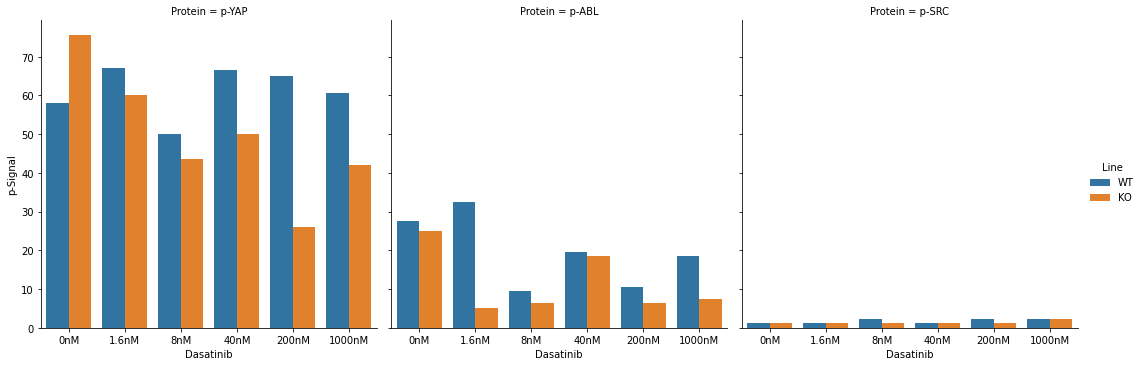

In [40]:
mfi = pd.read_csv("msresist/data/Validations/DasatinibDR_YAP_ABL_SRC_AvgNetMFI.csv")
mfi = pd.melt(mfi, id_vars=["Dasatinib", "Line"], value_vars=["p-YAP", "p-ABL", "p-SRC"], var_name="Protein", value_name="p-Signal")

ax = sns.catplot(data=mfi, x="Dasatinib", y="p-Signal", hue="Line", col="Protein", kind="bar", ax=ax)